Produce Light Curve for every star

In [1]:
from common import * 

/Users/thomas/.brite


In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 15, 'xtick.labelsize': 'small', 'ytick.labelsize': 'small','ytick.direction': 'in', 'xtick.direction': 'in',  # tells matplotlib to plot the ticks inward
                     'ytick.right': True, 'xtick.top': True, # tells matplotlib to plot the ticks also on the right and on the top
                     'xtick.minor.visible': True,'ytick.minor.visible': True, # include minor ticks as well
                     'xtick.major.width': 2, 'ytick.major.width': 2 # widht of major ticks
					 , 'ytick.minor.width': 1.25, 'xtick.minor.width': 1.25,})

In [3]:
config_dict = get_config()
default_result_entry = 'all'


In [4]:
def color(path):
    if 'BAb' in path or 'BLb' in path:
        return 'royalblue'
    elif 'BHr' in path or 'UBr' in path or 'BTr' in path:
        return 'firebrick'
    else:
        raise NameError('No Satellite Name in Path: ' + path)



def create_plot(path):
    name = path.split('/')[-1]
    data_path = os.path.join(config_dict['Decorrelation Path'],path)
    try:
        data = Data(path,None)
    except:
        return
    mosaic = """
            AABCD
            AABED
            """
    fig = plt.figure(constrained_layout=True,figsize = (15,5),dpi = 100)
    axes = fig.subplot_mosaic(mosaic)
    lk = data._lk_obj
    do_ave = True
    try:
        ave_lk = data._ave_lk_obj
    except OS_Error:
        do_ave = False
    
    
    zoom_in = lk[abs(lk.time.value - np.mean(lk.time.value)) <= 5]
    zoom_in_2 = lk[abs(lk.time.value - np.mean(lk.time.value) - 10) <= 5]
    if len(zoom_in_2.time.value) > len(zoom_in.time.value):
        zoom_in = zoom_in_2
    zoom_in_3 = lk[abs(lk.time.value - np.mean(lk.time.value) + 10) <= 5]
    if len(zoom_in_3.time.value) > len(zoom_in.time.value):
        zoom_in = zoom_in_3
    
    
    c = color(name)
    
    axes["A"].plot(lk.time.value, lk.flux.value, 'ko', ms = 0.5, alpha = 0.5)
    axes["A"].axvline(zoom_in.time.value[0], color = 'silver', lw = 1, ls = '--', zorder = 5)
    axes["A"].axvline(zoom_in.time.value[-1], color = 'silver', lw = 1, ls = '--', zorder = 5)
    axes["B"].plot(zoom_in.time.value, zoom_in.flux.value, 'ko', ms = 0.5, alpha = 0.5)
    
    if do_ave:
        ave_zoom_in = ave_lk[abs(ave_lk.time.value - zoom_in.time.value[0] - 5) <= 5]
        axes["B"].plot(ave_zoom_in.time.value, ave_zoom_in.flux.value,  color = c, ls = '', marker = 'o',  ms = 1.5, alpha = 0.75)
        axes["A"].plot(ave_lk.time.value, ave_lk.flux.value,  color = c, ls = '', marker = 'o', ms = 1.5, alpha = 0.75)
    
    pdg = data.to_periodogram(minimum_frequency = 0.1, maximum_frequency = 100)
    period = pdg.period_at_max_power.value
    period2 = 2*period
    print(period)
    

    
    
    axes["C"].plot((lk.time.value%period)/period, lk.flux.value, 'ko', ms = 0.5, alpha = 0.5)
    axes["C"].plot((lk.time.value%period)/period + 1, lk.flux.value, 'ko', ms = 0.5, alpha = 0.5)
    axes["E"].plot((lk.time.value%period2)/period2, lk.flux.value, 'ko', ms = 0.5, alpha = 0.5)
    axes["E"].plot((lk.time.value%period2)/period2 + 1, lk.flux.value, 'ko', ms = 0.5, alpha = 0.5)
    axes["D"].axvline(1/period, color = c, lw = 2, ls = '-')
    axes["D"].axvline(1/period2, color = c, lw = 2, ls = '--')
    axes["D"].plot(pdg.frequency, pdg.power, 'k-', lw = 1)
    
    
    if do_ave:
        axes["C"].plot((ave_lk.time.value%period)/period, ave_lk.flux.value, color = c, ls = '', marker = 'o', ms = 1.5, alpha = 0.75)
        axes["C"].plot((ave_lk.time.value%period)/period + 1, ave_lk.flux.value, color = c, ls = '', marker = 'o', ms = 1.5, alpha = 0.75)
        axes["E"].plot((ave_lk.time.value%period2)/period2, ave_lk.flux.value,  color = c, ls = '', marker = 'o', ms = 1.5, alpha = 0.75)
        axes["E"].plot((ave_lk.time.value%period2)/period2 + 1, ave_lk.flux.value, color = c, ls = '', marker = 'o', ms = 1.5, alpha = 0.75)
    
    axes["D"].set_xlim(0, np.max([10, 2/period]))
    axes["B"].set_yticklabels([])
    x1 = np.round(zoom_in.time.value[0] + 2, 0)
    x3 = np.round(zoom_in.time.value[0] + 8, 0)
    x2 = np.round((x1 + x3)/2, 0)
    axes["B"].set_xticks([x1, x2, x3])
    axes["C"].set_yticklabels([])
    axes["E"].set_yticklabels([])
    axes['D'].yaxis.tick_right()
    axes['D'].yaxis.set_label_position('right')
    axes['C'].xaxis.set_label_position('top') 
    axes["A"].invert_yaxis()
    axes["B"].invert_yaxis()
    axes["C"].invert_yaxis()
    axes["E"].invert_yaxis()
    axes["A"].set_xlabel("time (days)")
    axes["B"].set_xlabel("time (days)")
    axes["C"].set_xlabel("phase P={:3f}d".format(period))
    axes["E"].set_xlabel("phase P={:3f}d".format(period2))
    axes["D"].set_xlabel("frequency ($d^{-1}$)")
    axes["A"].set_ylabel("Magnitude")
    axes["D"].set_ylabel("Power")
    axes["D"].set_title("f={:3f} ".format(1/period) + '$d^{-1}$')
    ylim = axes["A"].get_ylim()
    axes["B"].set_ylim(ylim)
    axes["C"].set_ylim(ylim)
    axes["E"].set_ylim(ylim)
    fig.suptitle(name)
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.savefig(f"../LC_overview_plot/{name}.png", facecolor = "white")
    
    

Numbers of stars done: 12
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 14/HD_66811/RESULTS/HD66811_14-VelPup-II-2015_BAb_1_2_4_merged_.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1764 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 115 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3001 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 165 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1237 of "dubio

0.023358449906871186


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/ipykernel_launcher.py:104: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1773 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 113 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3039 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/

/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 14/HD_75311/RESULTS/HD75311_14-VelPup-II-2015_BAb_1_2_4_merged_.ndat
0.07944738413578903


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1168 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 40 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1326 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 55 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious ye

/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 14/HD_81188/RESULTS/HD81188_14-VelPup-II-2015_BAb_1_2_4_merged_.ndat
0.02571913167501503


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1176 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 25 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1210 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 55 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious ye

/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 14/HD_68273/RESULTS/HD68273_14-VelPup-II-2015_BAb_1_2_4_merged_.ndat
0.027086614623272765


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 824 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 27 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1177 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 52 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious yea

/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 14/HD_64760/RESULTS/HD64760_14-VelPup-II-2015_BAb_1_2_4_merged_.ndat
0.06825410421669983


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1175 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 25 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1310 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 57 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious ye

/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 14/HD_64740/RESULTS/HD64740_14-VelPup-II-2015_BAb_1_2_4_merged_.ndat
0.019627994788556386


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1182 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 27 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1276 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 55 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious ye

/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 14/HD_65575/RESULTS/HD65575_14-VelPup-II-2015_BAb_1_2_4_merged_.ndat
0.028656446649139685


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/ipykernel_launcher.py:104: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1586 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 97 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 2805 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/c

/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 14/HD_76728/RESULTS/HD76728_14-VelPup-II-2015_BAb_1_2_4_merged_.ndat
0.013921119909075812


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1190 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 107 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1137 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 56 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious y

/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 14/HD_80404/RESULTS/HD80404_14-VelPup-II-2015_BAb_1_2_4_merged_.ndat
0.03631194060280323


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1333 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 55 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3076 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/ipykernel_launcher.py:104: UserWarning: This figure was using constrained_layou

/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 14/HD_79351/RESULTS/HD79351_14-VelPup-II-2015_BAb_1_2_4_merged_.ndat
0.06033273434000288


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1090 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 23 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1222 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 56 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious ye

/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 14/HD_65818/RESULTS/HD65818_14-VelPup-II-2015_BAb_1_2_4_merged_.ndat
0.07711572604743361


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1059 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 23 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1308 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 55 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious ye

/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 14/HD_74195/RESULTS/HD74195_14-VelPup-II-2015_BAb_1_2_4_merged_.ndat
2.7734502789197757


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1038 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 42 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1349 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 54 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious ye

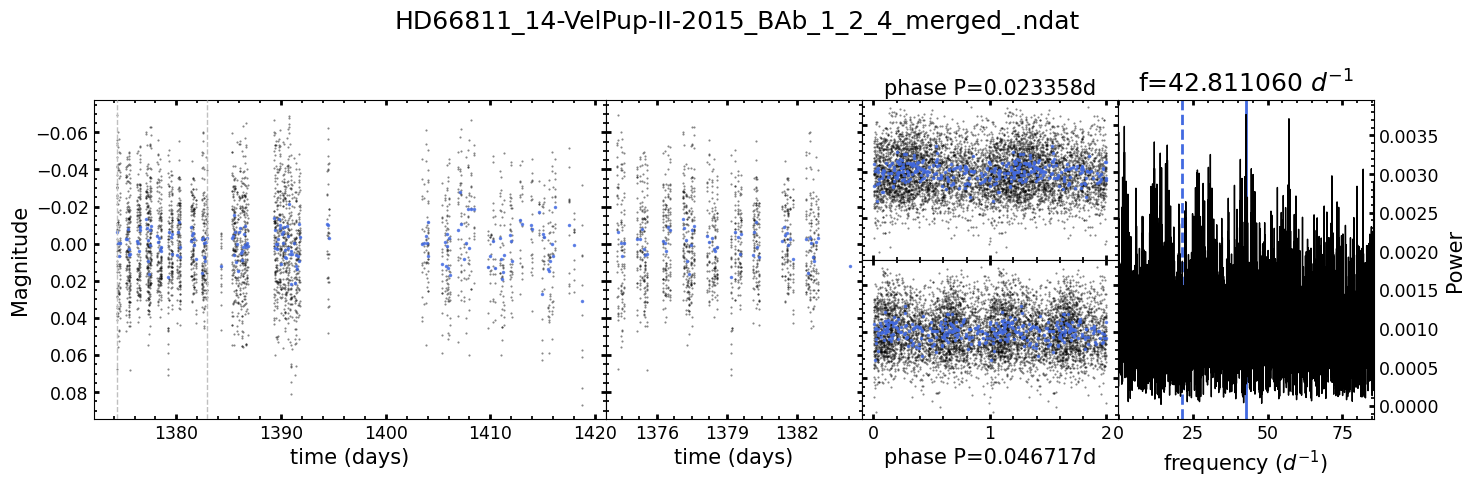

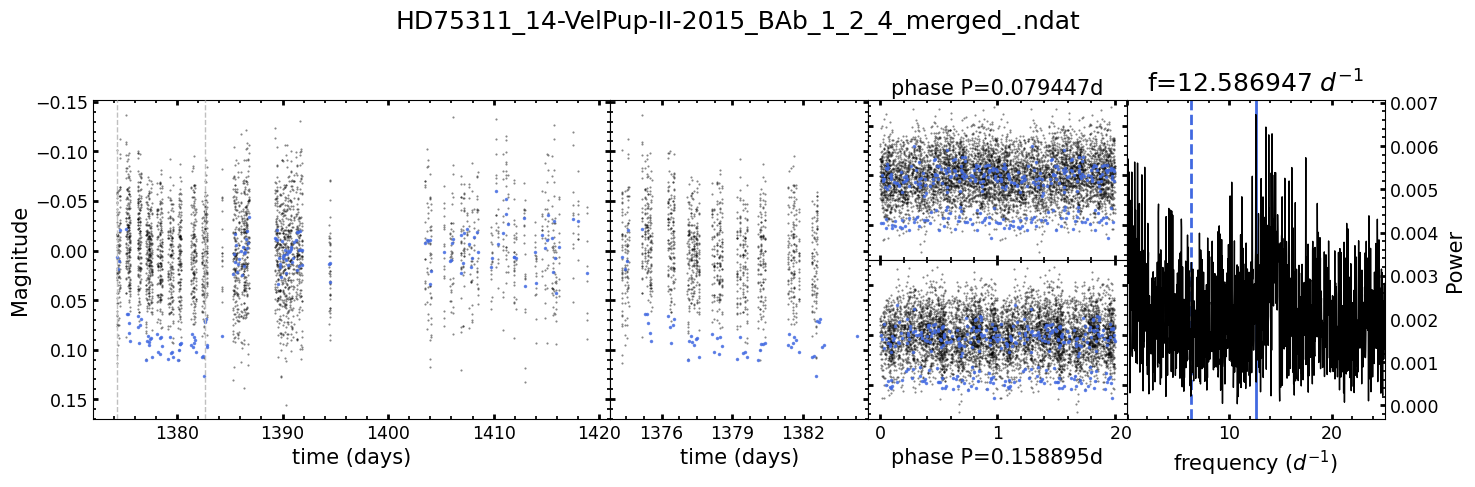

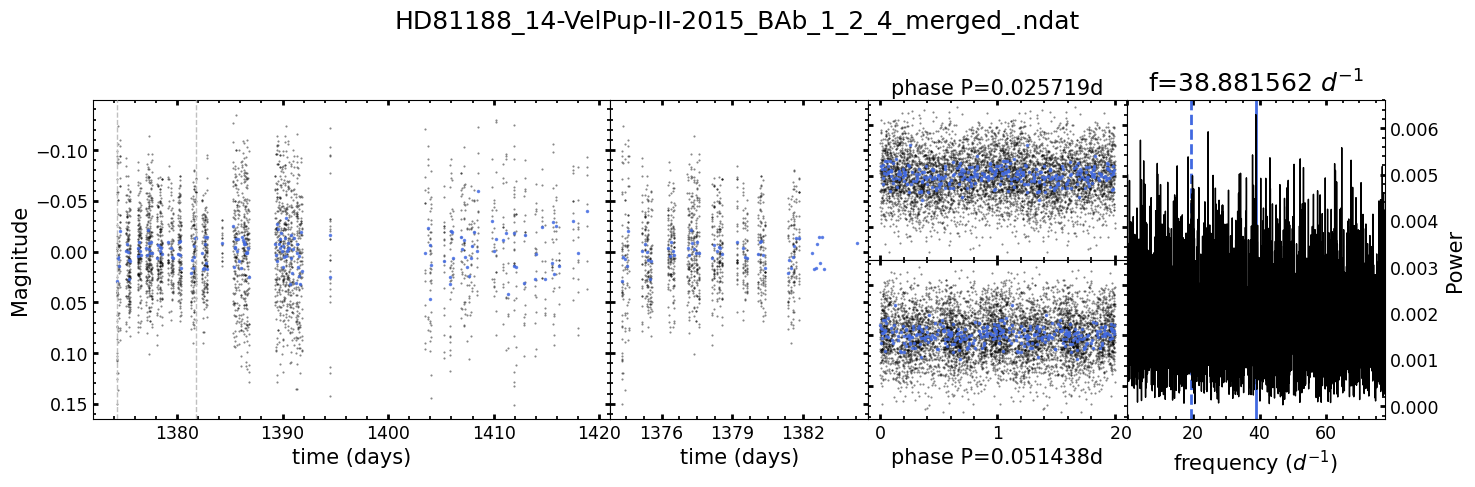

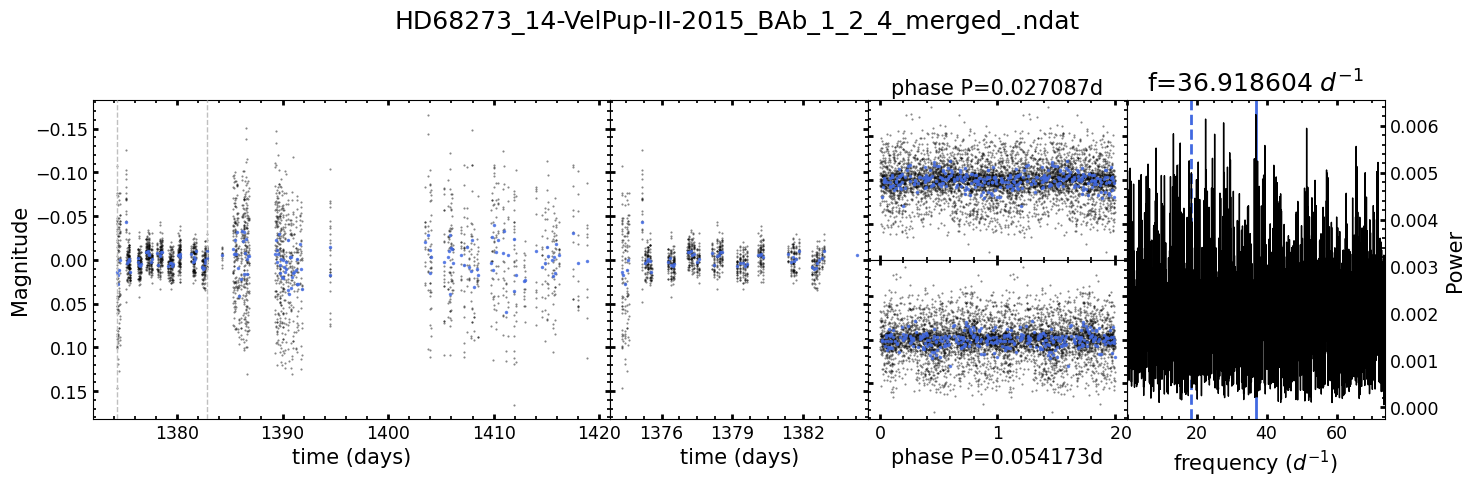

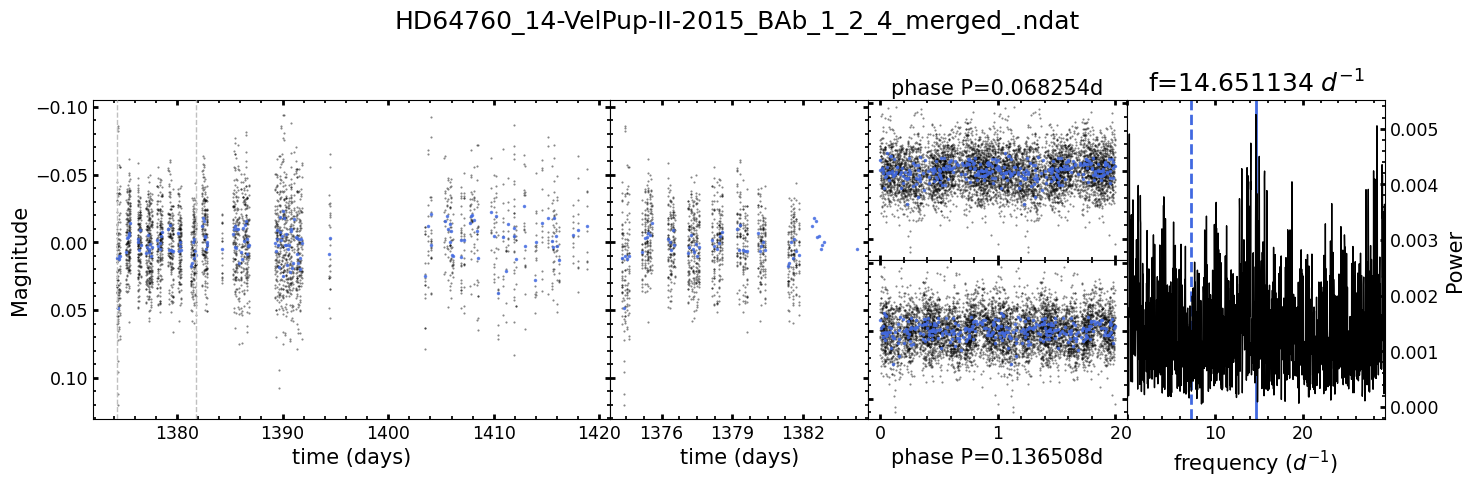

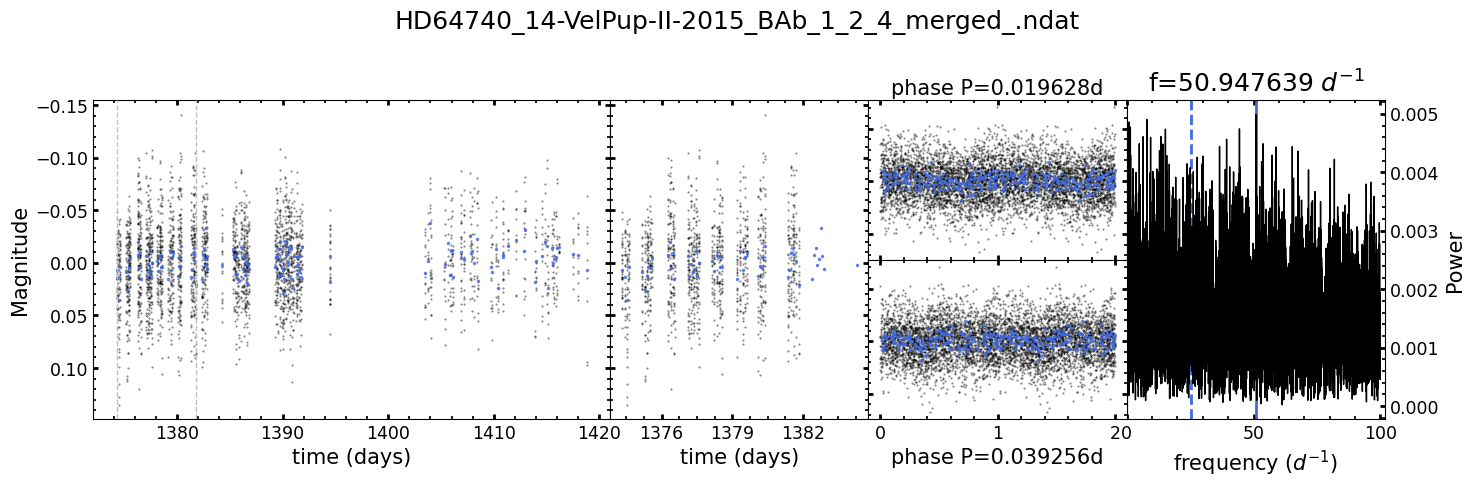

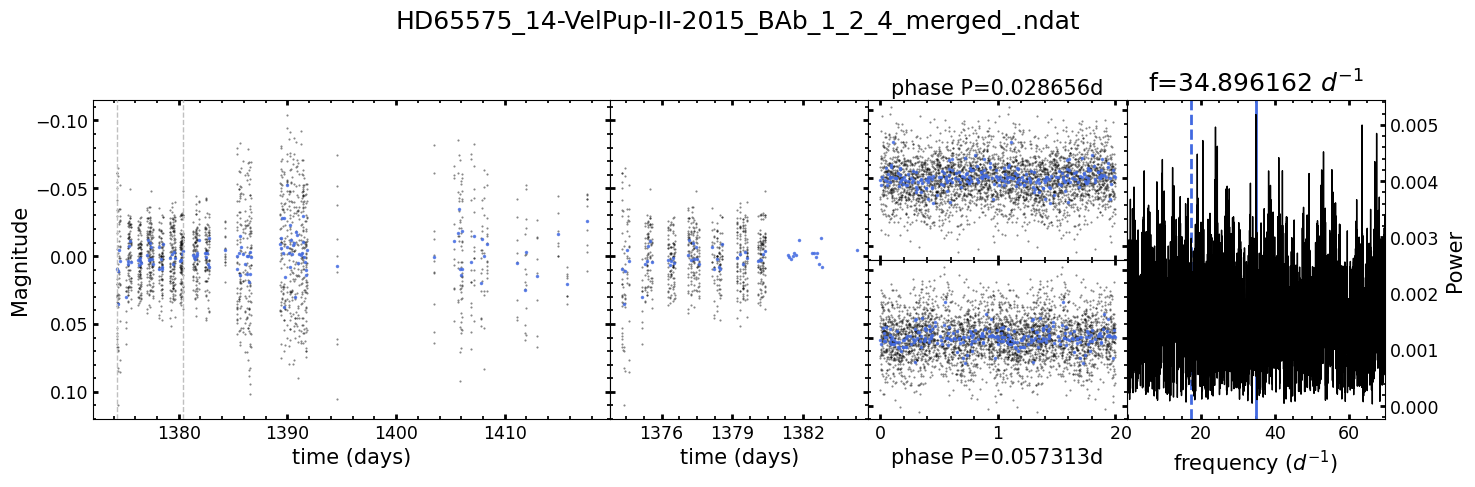

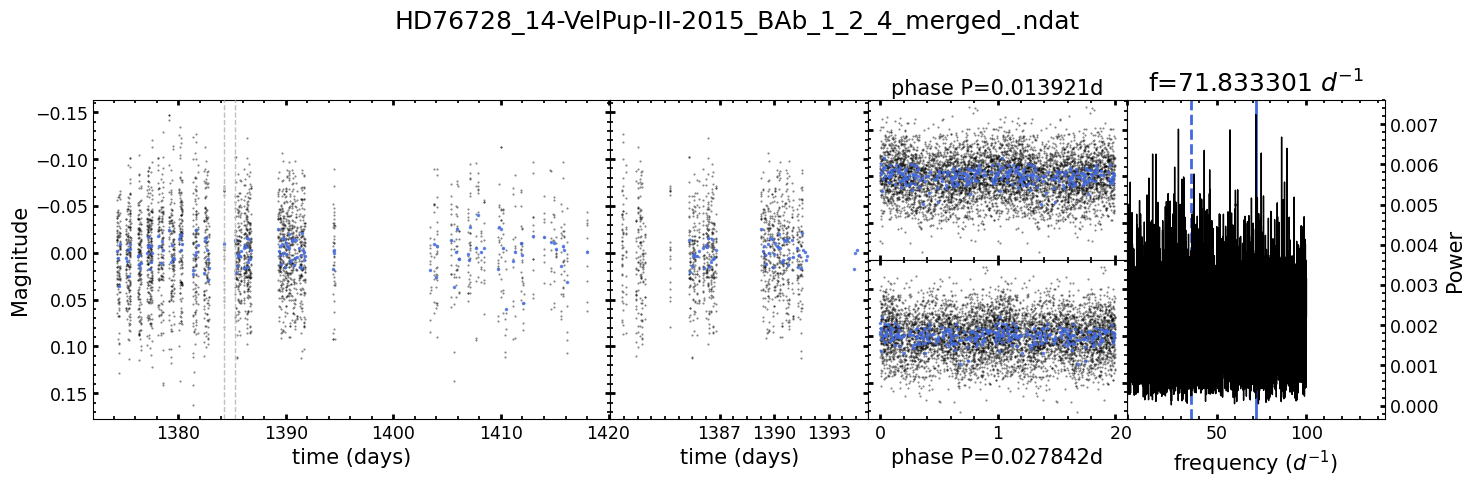

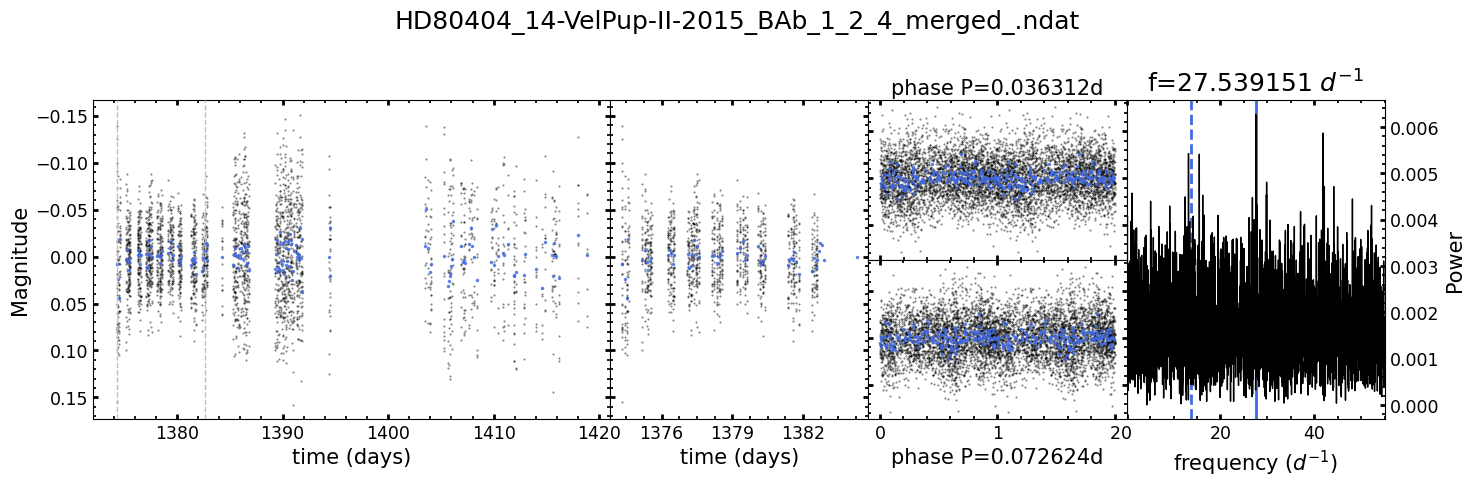

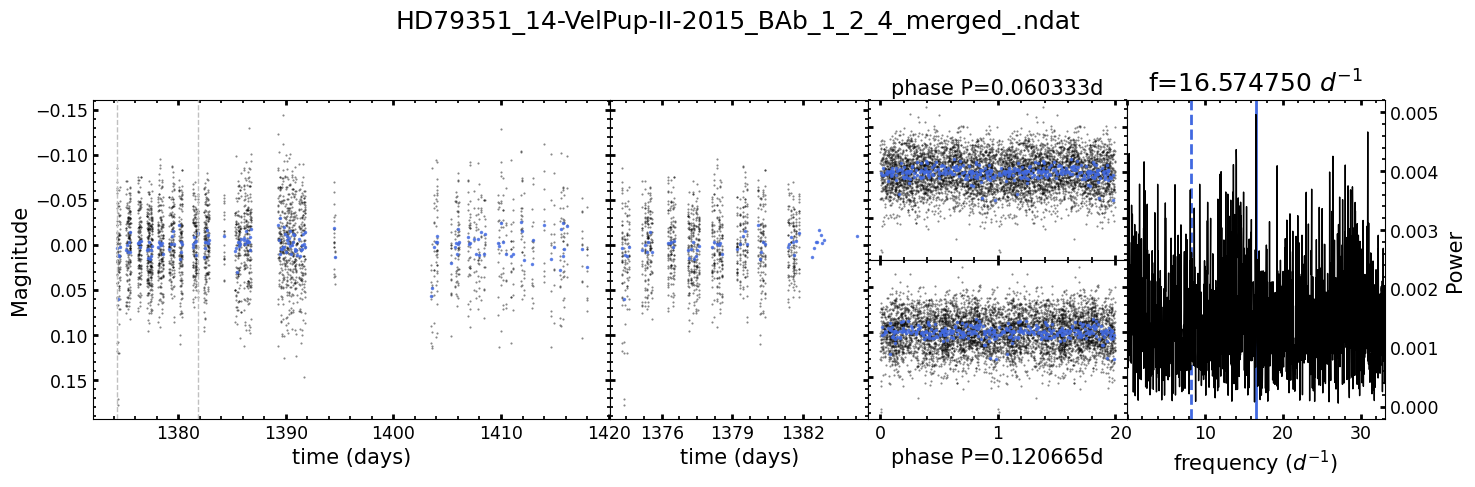

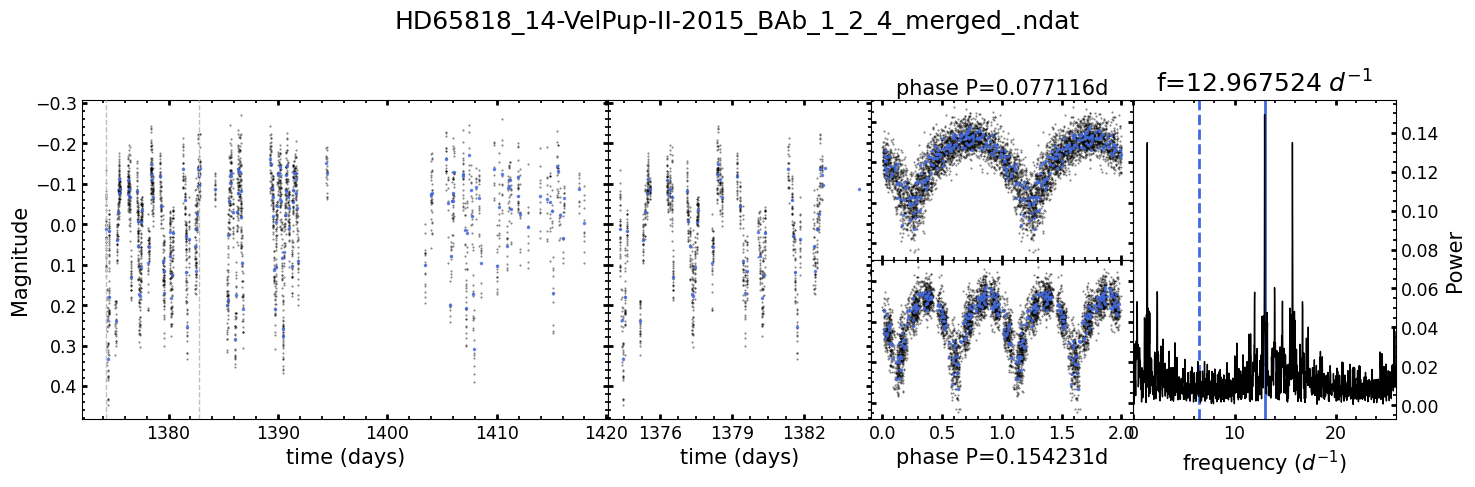

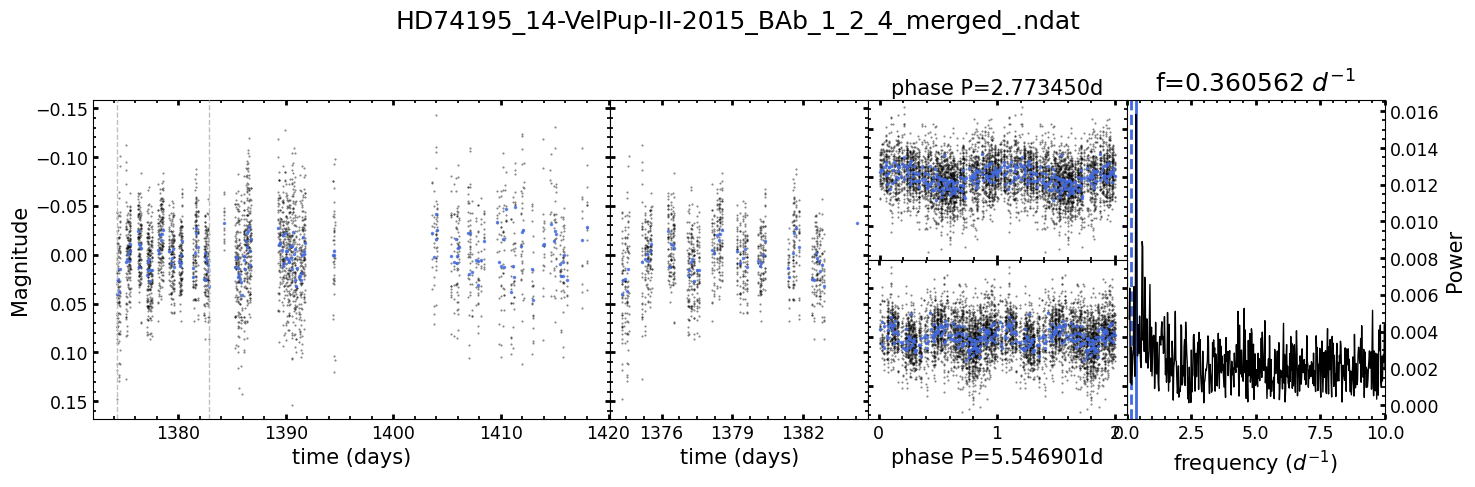

In [7]:
num = 0
# for field in [9, 10, 11, 12, 14]:
for field in [14]:
    stars = load(field)
    num += len(stars)
    print("Numbers of stars done:", num)
    for star in stars:
        result_path = star.results[0]
        for dataset in star.get_all_data_sets(result_path):
            if dataset.combined:
                print(dataset._path)
                create_plot(dataset._path)
            
#     if result_path == default_result_entry:
#             used_path = star._path
#     else:
#         used_path = os.path.join(star._path,result_path)
#     objects = {}

#     counter = 1

#     for root,dir,files in os.walk(used_path):
#         files = [i for i in files if i.endswith('ndat')]
#         for file in files:
#             objects[counter] = (file,os.path.join(root,file))
#             counter +=1
    
#     keys = objects.keys()
#     paths = [objects[key][1] for key in keys]
    
#     print(paths)
#     for p in paths:
#         if '_ME' in p:
#             create_plot(p)
    

        
        
        
#         path =  objects[key][1]
#         data = Data(path,None)
#         print(data)
#         data.scatter()
#     print(objects.keys())